### Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете fashion-mnist
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, losses, datasets, utils

from tensorflow.keras.losses import categorical_crossentropy

# AlexNet

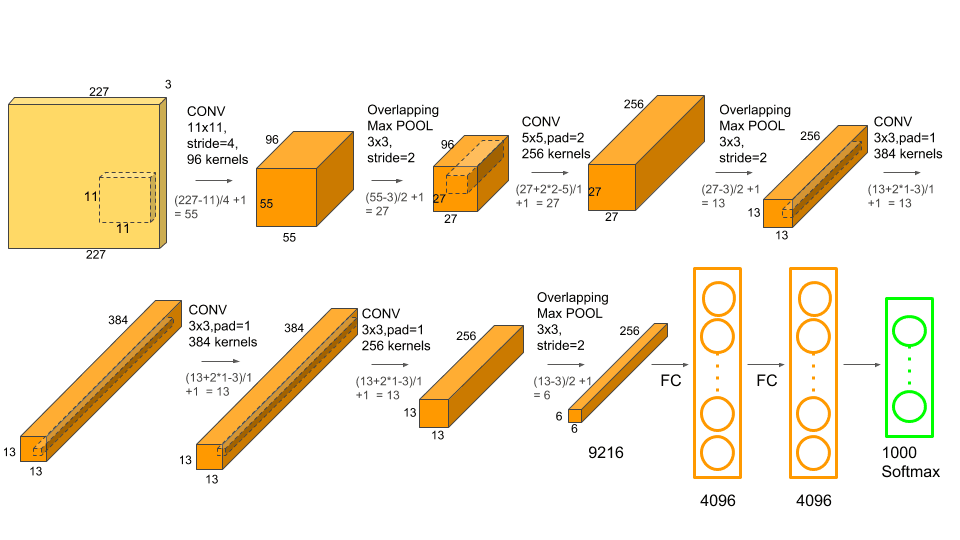

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = utils.to_categorical(y_train, 10) 
y_test = utils.to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [3]:
VALIDATION_SET_LENGTH = 2000

x_train = x_train[:-VALIDATION_SET_LENGTH, :, :, :]
y_train = y_train[:-VALIDATION_SET_LENGTH]

x_val = x_train[-VALIDATION_SET_LENGTH :, :, :, :]
y_val = y_train[-VALIDATION_SET_LENGTH:]

In [4]:
def model_alexNet(conv_layer1_width=96, 
                  conv_layer2_width=256, 
                  conv_layer3_width=384, 
                  conv_layer4_width=384, 
                  conv_layer5_width=256,
                  additional_layers_num=0):
    model = Sequential()

    model.add(layers.Conv2D(filters=conv_layer1_width, input_shape=(28, 28, 1), kernel_size=(11,11), strides=(4,4), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
   
    model.add(layers.Conv2D(filters=conv_layer2_width, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(layers.Conv2D(filters=conv_layer3_width, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
 
    model.add(layers.Conv2D(filters=conv_layer4_width, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
  
    model.add(layers.Conv2D(filters=conv_layer5_width, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

    model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
    
    for layer_num in range(additional_layers_num):
        model.add(layers.Conv2D(filters=conv_layer5_width, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(layers.Flatten())

    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.4))
 
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.4))
  
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.4))
  
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [5]:
model = model_alexNet()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 96)          11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)         8

In [6]:
model.compile(optimizer='adam',
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, 
                    batch_size=1024, 
                    epochs=20, 
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
57/57 [==============================] - 244s 4s/step - loss: 1.8819 - accuracy: 0.2362 - val_loss: 1.1681 - val_accuracy: 0.5040
Epoch 2/20
57/57 [==============================] - 242s 4s/step - loss: 0.8380 - accuracy: 0.6594 - val_loss: 0.6102 - val_accuracy: 0.7615
Epoch 3/20
57/57 [==============================] - 242s 4s/step - loss: 0.5397 - accuracy: 0.7975 - val_loss: 0.4011 - val_accuracy: 0.8570
Epoch 4/20
57/57 [==============================] - 244s 4s/step - loss: 0.3981 - accuracy: 0.8561 - val_loss: 0.3386 - val_accuracy: 0.8805
Epoch 5/20
57/57 [==============================] - 244s 4s/step - loss: 0.3444 - accuracy: 0.8742 - val_loss: 0.3350 - val_accuracy: 0.8745
Epoch 6/20
57/57 [==============================] - 241s 4s/step - loss: 0.3144 - accuracy: 0.8849 - val_loss: 0.2928 - val_accuracy: 0.8885
Epoch 7/20
57/57 [==============================] - 243s 4s/step - loss: 0.2942 - accuracy: 0.8904 - val_loss: 0.2650 - val_accuracy: 0.9035
Epoch 8/20
57

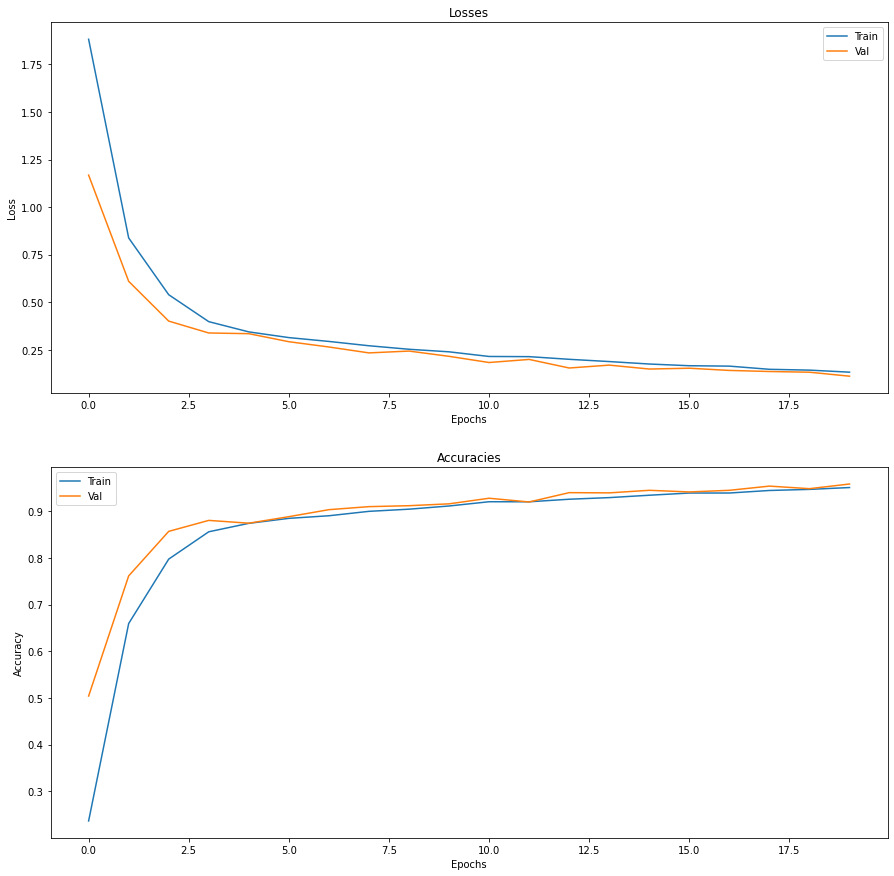

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Losses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Accuracies')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [8]:
test_score = model.evaluate(x_test, y_test)
print("loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 6s 18ms/step - loss: 0.3642 - accuracy: 0.8955
loss 0.3642, accuracy 89.55%


### Увеличения ширины сети

In [23]:
widths = [{'layer1_width': 96,     'layer2_width': 256,     'layer3_width': 384,     'layer4_width': 384,     'layer5_width': 256},  
          {'layer1_width': 96+50,  'layer2_width': 256+50,  'layer3_width': 384+50,  'layer4_width': 384+50,  'layer5_width': 256+50}, 
          {'layer1_width': 96+100, 'layer2_width': 256+100, 'layer3_width': 384+100, 'layer4_width': 384+100, 'layer5_width': 256+100}]

results_width = []
for w in widths:
    print(f'--- Processing: width: {w} ---')
    
    model = model_alexNet(conv_layer1_width=w['layer1_width'],
                         conv_layer2_width=w['layer2_width'],
                         conv_layer3_width=w['layer3_width'],
                         conv_layer4_width=w['layer4_width'],
                         conv_layer5_width=w['layer5_width'])
    
    model.compile(optimizer='adam',
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

    hist = model.fit(x=x_train, y=y_train, 
                    batch_size=1024, 
                    epochs=10, 
                    validation_data=(x_val, y_val),
                    verbose=0)
    
    test_score = model.evaluate(x_test, y_test)
    
    widths_str = f"{w['layer1_width']} {w['layer2_width']} {w['layer3_width']} {w['layer4_width']} {w['layer5_width']}"
    
    results_width.append(
        {'widths': widths_str, 
         
         'loss': hist.history['loss'], 
         'val_loss': hist.history['val_loss'], 
         
         'accuracy': hist.history['accuracy'],
         'val_accuracy': hist.history['val_accuracy'],
         
         'test_loss': test_score[0],
         'test_accuracy': test_score[1] * 100})

--- Processing: width: {'layer1_width': 96, 'layer2_width': 256, 'layer3_width': 384, 'layer4_width': 384, 'layer5_width': 256} ---
313/313 [==============================] - 7s 21ms/step - loss: 0.3280 - accuracy: 0.8842
--- Processing: width: {'layer1_width': 146, 'layer2_width': 306, 'layer3_width': 434, 'layer4_width': 434, 'layer5_width': 306} ---
313/313 [==============================] - 7s 22ms/step - loss: 0.3264 - accuracy: 0.8895
--- Processing: width: {'layer1_width': 196, 'layer2_width': 356, 'layer3_width': 484, 'layer4_width': 484, 'layer5_width': 356} ---
313/313 [==============================] - 7s 24ms/step - loss: 0.3265 - accuracy: 0.8920


### Увеличения количества слоев

In [24]:
additional_layers_nums = [0, 1, 2]

results_layers = []
for layers_num in additional_layers_nums:
    print(f'--- Processing: layers_num: {layers_num} ---')
    
    model = model_alexNet(additional_layers_num=layers_num)
    model.compile(optimizer='adam',
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

    hist = model.fit(x=x_train, y=y_train, 
                    batch_size=1024, 
                    epochs=10, 
                    validation_data=(x_val, y_val),
                    verbose=0)
    
    test_score = model.evaluate(x_test, y_test)
    
    results_layers.append(
        {'additional_layers_num' : layers_num,
         
         'loss': hist.history['loss'], 
         'val_loss': hist.history['val_loss'], 
         
         'accuracy': hist.history['accuracy'],
         'val_accuracy': hist.history['val_accuracy'],
         
         'test_loss': test_score[0],
         'test_accuracy': test_score[1] * 100})

--- Processing: layers_num: 0 ---
313/313 [==============================] - 6s 21ms/step - loss: 0.3431 - accuracy: 0.8821
--- Processing: layers_num: 1 ---
313/313 [==============================] - 6s 20ms/step - loss: 0.3927 - accuracy: 0.8720
--- Processing: layers_num: 2 ---
313/313 [==============================] - 6s 19ms/step - loss: 0.3689 - accuracy: 0.8754


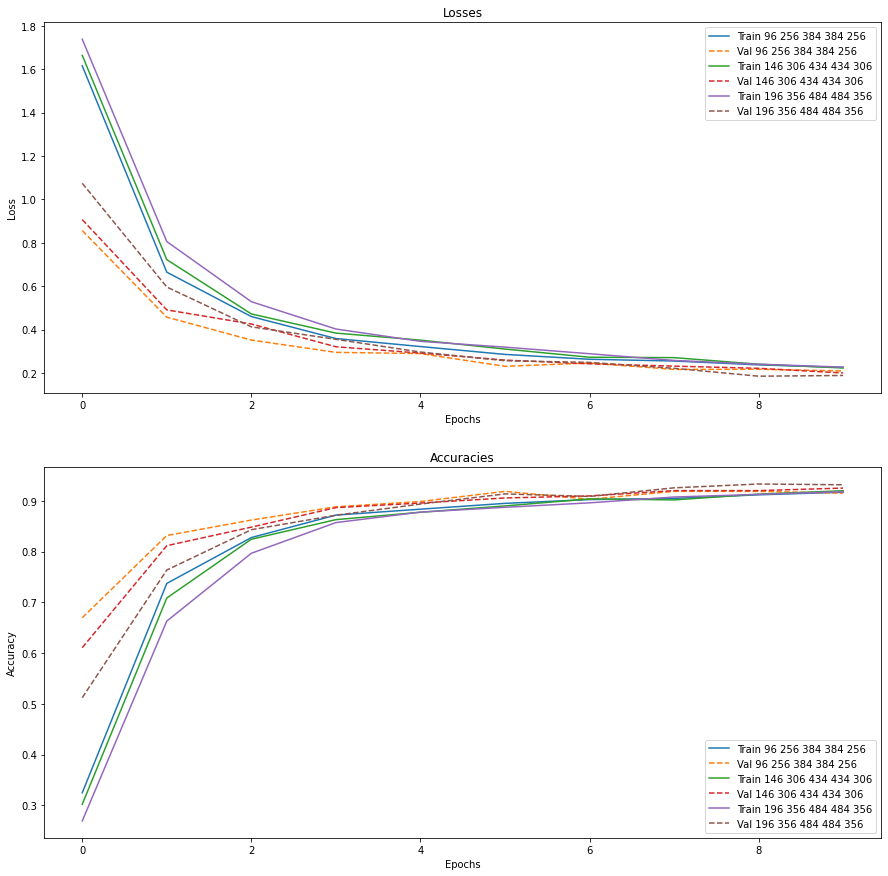

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
for res in results_width:    
    
    axs[0].plot(res['loss'], '-', label=f"Train {res['widths']}")
    axs[0].plot(res['val_loss'], '--', label=f"Val {res['widths']}")
    axs[0].title.set_text('Losses')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    
    axs[1].plot(res['accuracy'], '-', label=f"Train {res['widths']}")
    axs[1].plot(res['val_accuracy'], '--', label=f"Val {res['widths']}")
    axs[1].title.set_text('Accuracies')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')

axs[0].legend()
axs[1].legend()   

In [28]:
import pandas as pd

In [36]:
result_table_width = pd.DataFrame(results_width, 
                                  columns=['widths', 
                                           'loss', 
                                           'val_loss', 
                                           'accuracy', 
                                           'val_accuracy', 
                                           'test_loss', 
                                           'test_accuracy']).sort_values('test_accuracy', ascending=False)
result_table_width = result_table_width.drop(columns = ['loss', 'val_loss', 'accuracy', 'val_accuracy'])
result_table_width.head()

,widths,test_loss,test_accuracy
2,196 356 484 484 356,0.326515,89.200002
1,146 306 434 434 306,0.326448,88.950002
0,96 256 384 384 256,0.328032,88.419998


Увеличение количества нейронов в слоях повысило точность на тестовый выборке

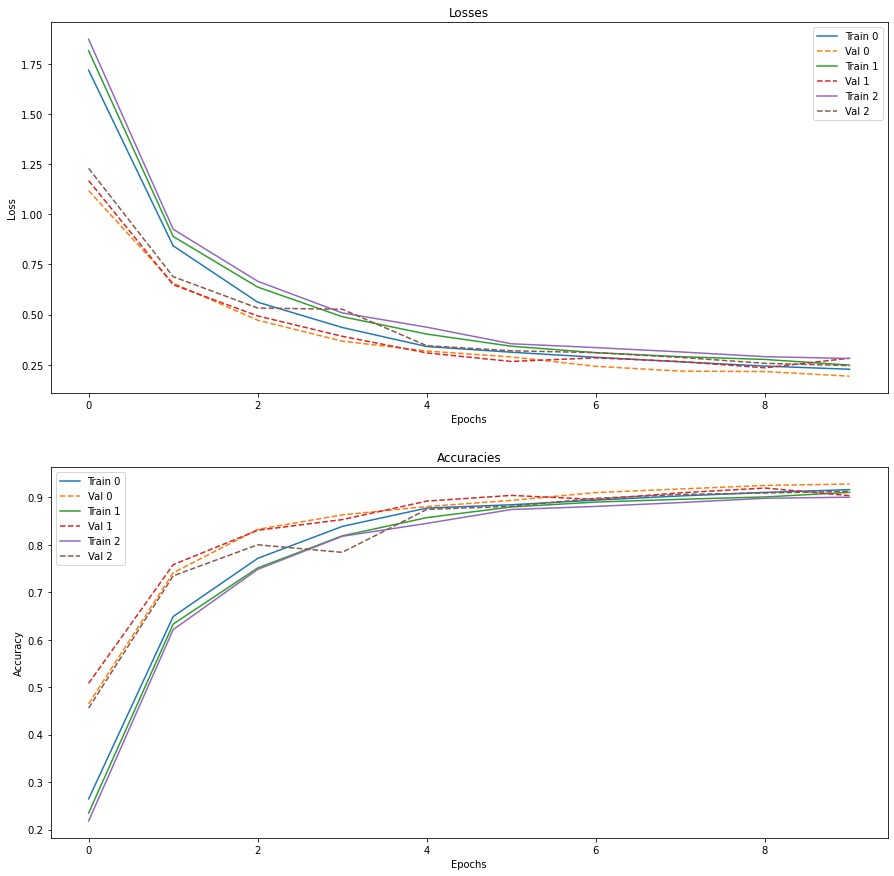

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
for res in results_layers:    
    
    axs[0].plot(res['loss'], '-', label=f"Train {res['additional_layers_num']}")
    axs[0].plot(res['val_loss'], '--', label=f"Val {res['additional_layers_num']}")
    axs[0].title.set_text('Losses')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    
    axs[1].plot(res['accuracy'], '-', label=f"Train {res['additional_layers_num']}")
    axs[1].plot(res['val_accuracy'], '--', label=f"Val {res['additional_layers_num']}")
    axs[1].title.set_text('Accuracies')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')

axs[0].legend()
axs[1].legend()   

In [39]:
result_table_layers = pd.DataFrame(results_layers, 
                                  columns=['additional_layers_num', 
                                           'loss', 
                                           'val_loss', 
                                           'accuracy', 
                                           'val_accuracy', 
                                           'test_loss', 
                                           'test_accuracy']).sort_values('test_accuracy', ascending=False)
result_table_layers = result_table_layers.drop(columns = ['loss', 'val_loss', 'accuracy', 'val_accuracy'])
result_table_layers.head()

,additional_layers_num,test_loss,test_accuracy
0,0,0.343057,88.209999
2,2,0.368864,87.540001
1,1,0.392669,87.199998


Увеличение количества слое отрицательно сказалось на точности на тестовой выборке

### Сравнение с точностью полносвязной сети для этой выборки

In [46]:
def model_fullyDense(conv_layer1_width=96,
                     conv_layer2_width=256, 
                     conv_layer3_width=384, 
                     conv_layer4_width=384, 
                     conv_layer5_width=256):
    model = Sequential()

    model.add(layers.Dense(conv_layer1_width, input_shape=(784,), activation='relu'))
   
    model.add(layers.Dense(conv_layer2_width, activation='relu'))
    
    model.add(layers.Dense(conv_layer3_width, activation='relu'))
 
    model.add(layers.Dense(conv_layer4_width, activation='relu'))
  
    model.add(layers.Dense(conv_layer5_width, activation='relu'))

    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.4))
 
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.4))
  
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.4))
  
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [43]:
x_train_flat = x_train.reshape((-1, 784))
x_test_flat = x_test.reshape((-1, 784))
x_val_falt = x_val.reshape((-1, 784))

In [47]:
model = model_fullyDense()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 96)                75360     
_________________________________________________________________
dense_53 (Dense)             (None, 256)               24832     
_________________________________________________________________
dense_54 (Dense)             (None, 384)               98688     
_________________________________________________________________
dense_55 (Dense)             (None, 384)               147840    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               98560     
_________________________________________________________________
dense_57 (Dense)             (None, 4096)              1052672   
_________________________________________________________________
dropout_39 (Dropout)         (None, 4096)            

In [49]:
model.compile(optimizer='adam',
              loss=losses.categorical_crossentropy, 
              metrics=['accuracy'])

history = model.fit(x=x_train_flat, y=y_train, 
                    batch_size=1024, 
                    epochs=20, 
                    validation_data=(x_val_falt, y_val),
                    verbose=1)

Epoch 1/20
57/57 [==============================] - 49s 861ms/step - loss: 0.9922 - accuracy: 0.6214 - val_loss: 0.4925 - val_accuracy: 0.8190
Epoch 2/20
57/57 [==============================] - 49s 860ms/step - loss: 0.4539 - accuracy: 0.8322 - val_loss: 0.3731 - val_accuracy: 0.8600
Epoch 3/20
57/57 [==============================] - 50s 868ms/step - loss: 0.3767 - accuracy: 0.8605 - val_loss: 0.3346 - val_accuracy: 0.8725
Epoch 4/20
57/57 [==============================] - 49s 867ms/step - loss: 0.3494 - accuracy: 0.8704 - val_loss: 0.3041 - val_accuracy: 0.8825
Epoch 5/20
57/57 [==============================] - 49s 859ms/step - loss: 0.3188 - accuracy: 0.8830 - val_loss: 0.2864 - val_accuracy: 0.8870
Epoch 6/20
57/57 [==============================] - 49s 857ms/step - loss: 0.2957 - accuracy: 0.8902 - val_loss: 0.2606 - val_accuracy: 0.8985
Epoch 7/20
57/57 [==============================] - 49s 857ms/step - loss: 0.2844 - accuracy: 0.8935 - val_loss: 0.2642 - val_accuracy: 0.8975

In [50]:
test_score = model.evaluate(x_test_flat, y_test)
print("loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 6s 19ms/step - loss: 0.3947 - accuracy: 0.8843
loss 0.3947, accuracy 88.43%


Точность сети AlexNet оказалась выше, чем точность полносвязной сети